In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('../outputs/results.csv')
data

,Label,Final Loss,Runtime (seconds)
0,LTC_generate_sinusoidal_data_FullyConnected_lr...,0.463782,10.754282
1,LTC_generate_sinusoidal_data_RandomSparsity75_...,0.491573,5.204076
2,LTC_generate_sinusoidal_data_AutoNCP_lr0.01_ba...,0.445213,5.175495
3,LTC_generate_sinusoidal_data_FullyConnected_lr...,0.446954,5.150410
4,LTC_generate_sinusoidal_data_RandomSparsity75_...,0.600567,5.322588
...,...,...,...
103,RNN_generate_noisy_data_bi-RNN_lr0.001_batch1_...,0.652396,1.775447
104,RNN_generate_noisy_data_bi-LSTM_lr0.001_batch1...,0.525576,3.829720
105,RNN_generate_noisy_data_LSTM_lr0.0001_batch1_n...,0.463400,2.598858
106,RNN_generate_noisy_data_bi-RNN_lr0.0001_batch1...,0.729422,1.960660


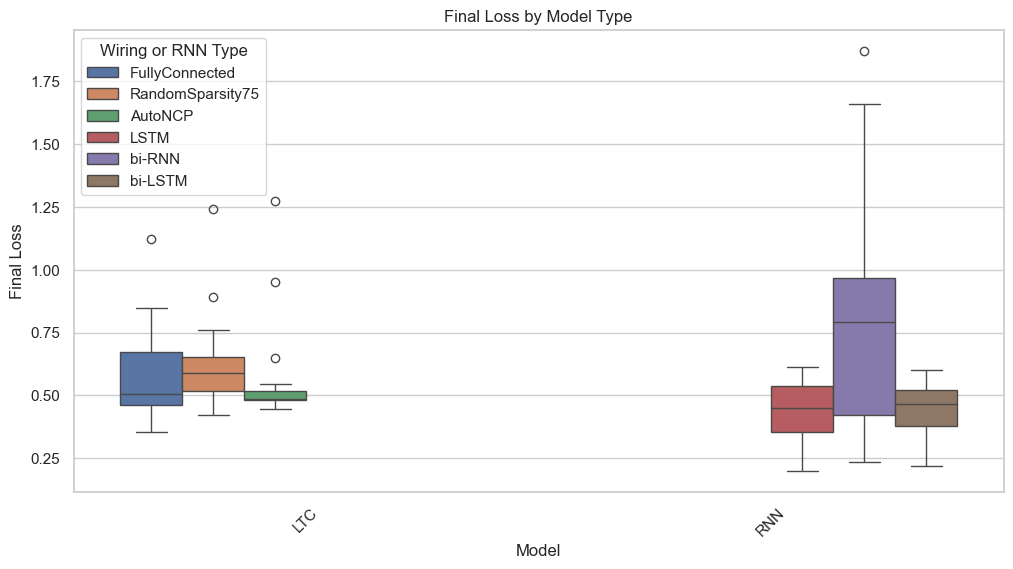

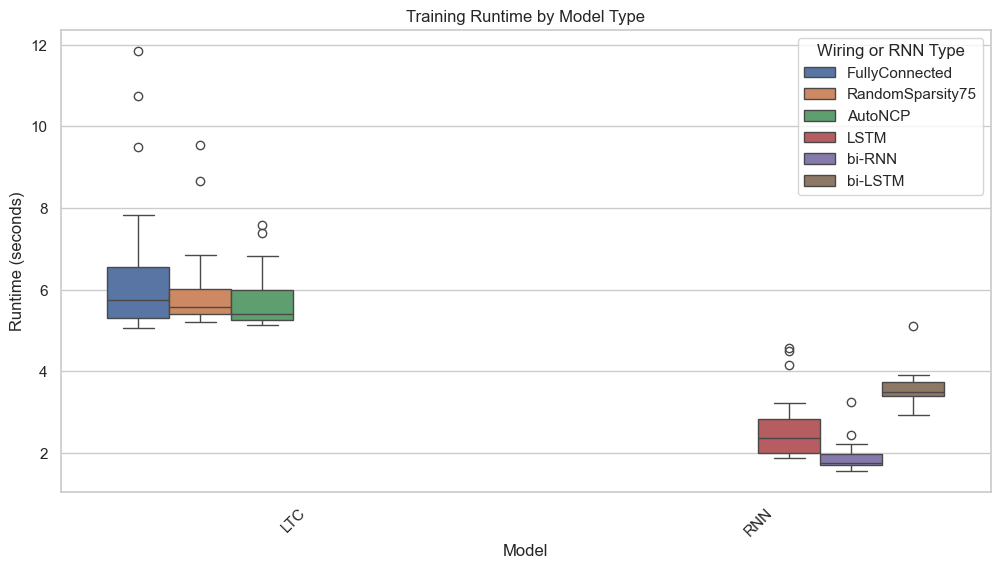

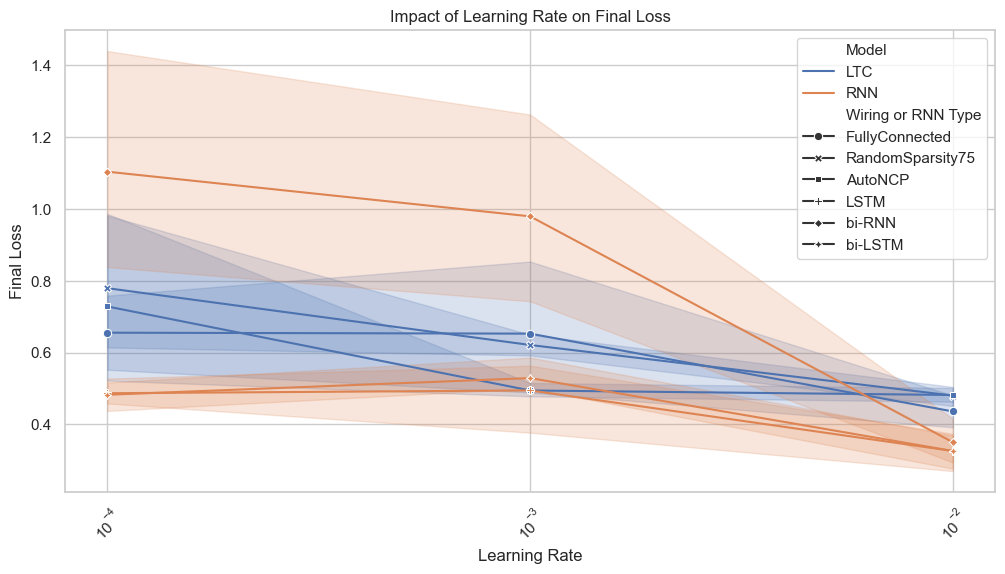

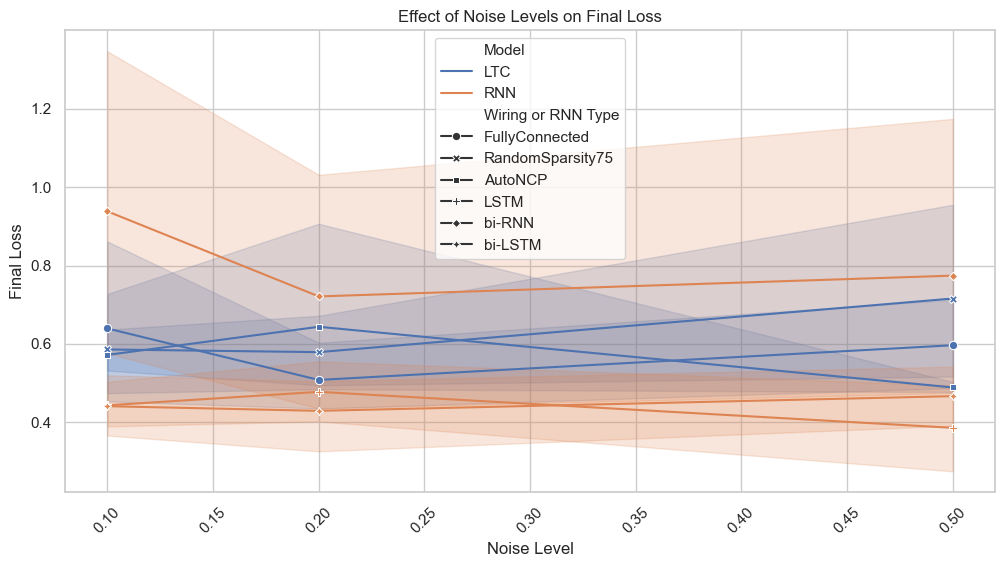

In [4]:
df = data.copy()
df["Final Loss"] = df["Final Loss"].astype(float)
df["Runtime (seconds)"] = df["Runtime (seconds)"].astype(float)

# Extracting parameters from the Label column
df["Model"] = df["Label"].apply(lambda x: x.split('_')[0])
df["Data Type"] = df["Label"].apply(lambda x: x.split('_')[2])
df["Wiring or RNN Type"] = df["Label"].apply(lambda x: x.split('_')[4])
df["Learning Rate"] = df["Label"].apply(lambda x: float(x.split('_')[5].replace("lr", "")))
df["Noise Level"] = df["Label"].apply(lambda x: float(x.split('_')[7].replace("noise", "")))
df["Sequence Length"] = df['Label'].apply(lambda x: int(x.split('_')[-1].replace("length", "")))
# Set up the Seaborn style
sns.set(style="whitegrid")

# 1. Final Loss by Model Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Model", y="Final Loss", hue="Wiring or RNN Type")
plt.title("Final Loss by Model Type")
plt.xticks(rotation=45)
plt.show()

# 2. Training Runtime by Model Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Model", y="Runtime (seconds)", hue="Wiring or RNN Type")
plt.title("Training Runtime by Model Type")
plt.xticks(rotation=45)
plt.show()

# 3. Impact of Learning Rate on Final Loss
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Learning Rate", y="Final Loss", hue="Model", style="Wiring or RNN Type", markers=True, dashes=False)
plt.xscale("log")
plt.title("Impact of Learning Rate on Final Loss")
plt.xticks(rotation=45)
plt.show()

# 4. Effect of Noise Levels on Final Loss
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Noise Level", y="Final Loss", hue="Model", style="Wiring or RNN Type", markers=True, dashes=False)
plt.title("Effect of Noise Levels on Final Loss")
plt.xticks(rotation=45)
plt.show()



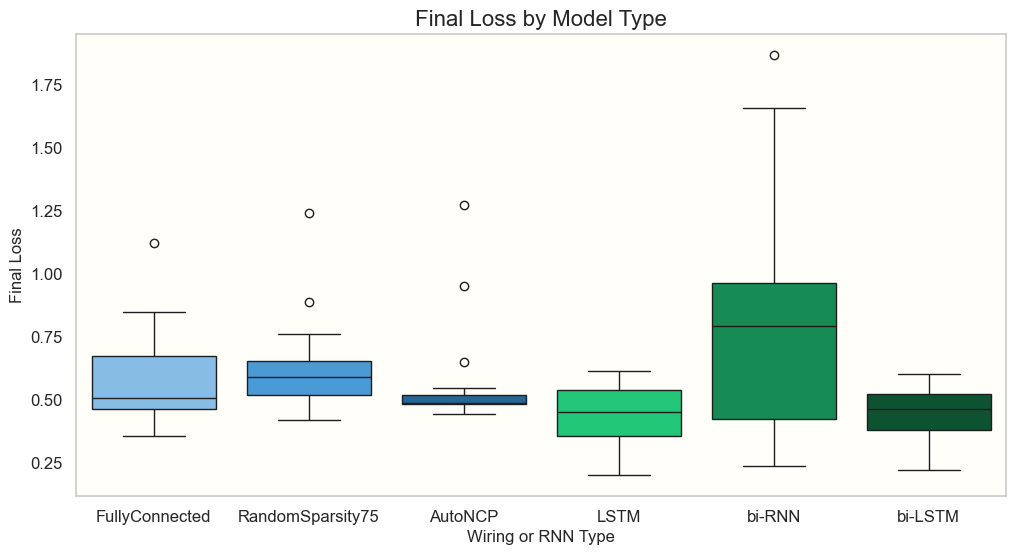

In [5]:
# Set up the Seaborn style with custom background color and no grid
sns.set(style="whitegrid", rc={"axes.facecolor": "#FFFEF9", "axes.grid": False})

# Define custom color palettes
ltc_palette = ["#78BFF4", "#329DEE", "#0F69AD"]
rnn_palette = ["#05E178", "#039F55", "#025E32"]

# Combine the palettes
custom_palette = ltc_palette + rnn_palette

# 1. Final Loss by Model Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Wiring or RNN Type", y="Final Loss", hue="Wiring or RNN Type", palette=custom_palette)
plt.title("Final Loss by Model Type", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend([],[], frameon=False)  # Remove the legend
plt.show()

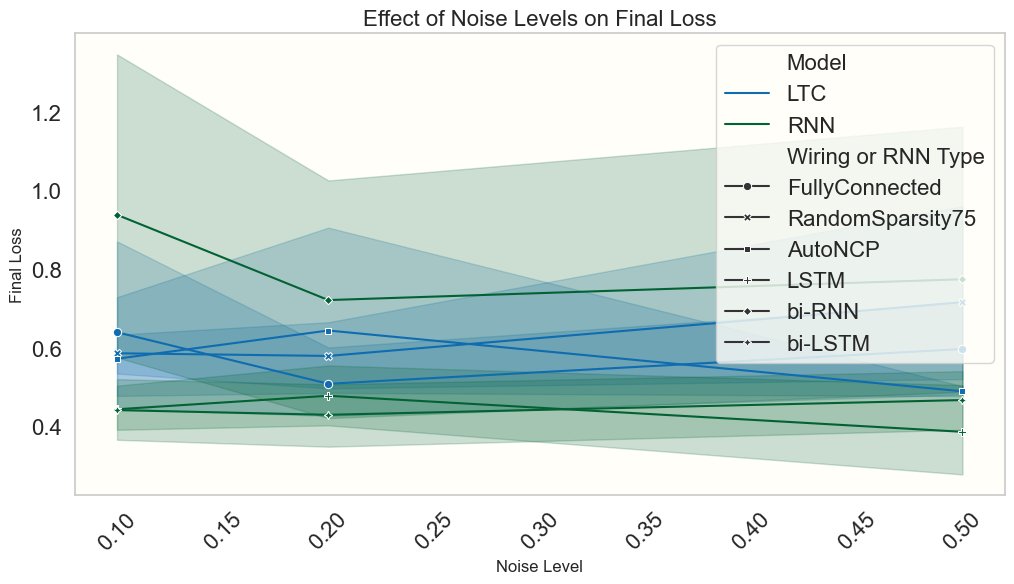

In [6]:
# 4. Effect of Noise Levels on Final Loss
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Noise Level", y="Final Loss", hue="Model", style="Wiring or RNN Type", markers=True, dashes=False, palette=["#0F6CB1", "#026234"])
plt.title("Effect of Noise Levels on Final Loss", fontsize=16)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=16)
plt.grid(False)
plt.show()


In [7]:
results_file = 'C:\\Users\\lcorpaci\\Documents\\Thesis\\reasoning-with-LLMs\\outputs\\results_25epochs.csv'

results_df = pd.read_csv(results_file, encoding='utf-8')
results_df

,label,test_loss,val_loss,epoch_1_loss,epoch_2_loss,epoch_3_loss,epoch_4_loss,epoch_5_loss,epoch_6_loss,epoch_7_loss,...,epoch_16_loss,epoch_17_loss,epoch_18_loss,epoch_19_loss,epoch_20_loss,epoch_21_loss,epoch_22_loss,epoch_23_loss,epoch_24_loss,epoch_25_loss
0,LTC_AutoNCP_4_lr0.0001_batch10_noise0_length24,0.431200,0.431200,0.500587,0.494220,0.489302,0.485516,0.482606,0.480366,0.478631,...,0.469486,0.467956,0.466075,0.463748,0.460871,0.457332,0.453029,0.447885,0.441859,0.434973
1,LTC_RandomSparsity75_4_lr0.0001_batch10_noise0...,0.446979,0.446978,0.742204,0.718919,0.697901,0.678483,0.660179,0.642660,0.625723,...,0.502362,0.493347,0.485308,0.478161,0.471809,0.466157,0.461110,0.456580,0.452487,0.448762
2,LTC_FullyConnected_4_lr0.0001_batch10_noise0_l...,0.440916,0.440916,1.294436,1.241115,1.189692,1.140010,1.091793,1.044708,0.998400,...,0.544784,0.519907,0.504279,0.492773,0.483176,0.474575,0.466562,0.458950,0.451629,0.444500
3,LTC_AutoNCP_8_lr0.0001_batch10_noise0_length24,0.351372,0.351372,0.525579,0.510647,0.497783,0.487444,0.479693,0.473707,0.468787,...,0.440737,0.437387,0.433407,0.428463,0.422144,0.413987,0.403216,0.389451,0.373699,0.358346
4,LTC_RandomSparsity75_8_lr0.0001_batch10_noise0...,0.479444,0.479444,0.595789,0.569960,0.551377,0.537687,0.527233,0.518996,0.512347,...,0.485591,0.484399,0.483387,0.482530,0.481806,0.481195,0.480681,0.480249,0.479886,0.479581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,RNN_bi-RNN_8_lr0.05_batch10_noise0.1_length24,0.014508,0.014086,0.118230,0.010953,0.010639,0.010720,0.010752,0.010717,0.010958,...,0.011404,0.011605,0.011812,0.011542,0.012081,0.011401,0.011203,0.011503,0.011157,0.011529
321,RNN_bi-LSTM_8_lr0.05_batch10_noise0.1_length24,0.012079,0.011727,0.035409,0.010865,0.010818,0.010818,0.010718,0.010904,0.010826,...,0.010926,0.010629,0.010771,0.010635,0.010699,0.010733,0.011090,0.010919,0.010560,0.010565
322,RNN_LSTM_16_lr0.05_batch10_noise0.1_length24,0.011494,0.011108,0.048007,0.010875,0.010616,0.010719,0.010511,0.010698,0.010726,...,0.010930,0.010578,0.010782,0.010652,0.010716,0.010619,0.010565,0.010617,0.010854,0.010624
323,RNN_bi-RNN_16_lr0.05_batch10_noise0.1_length24,0.011155,0.010696,0.153236,0.013650,0.011323,0.011048,0.010926,0.011122,0.010972,...,0.012274,0.011726,0.012693,0.012416,0.011541,0.012216,0.012330,0.011924,0.012453,0.012678


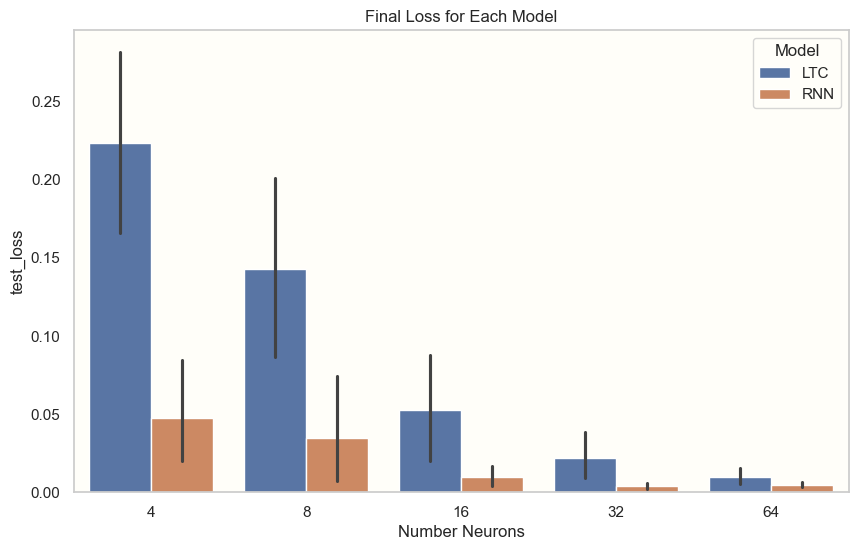

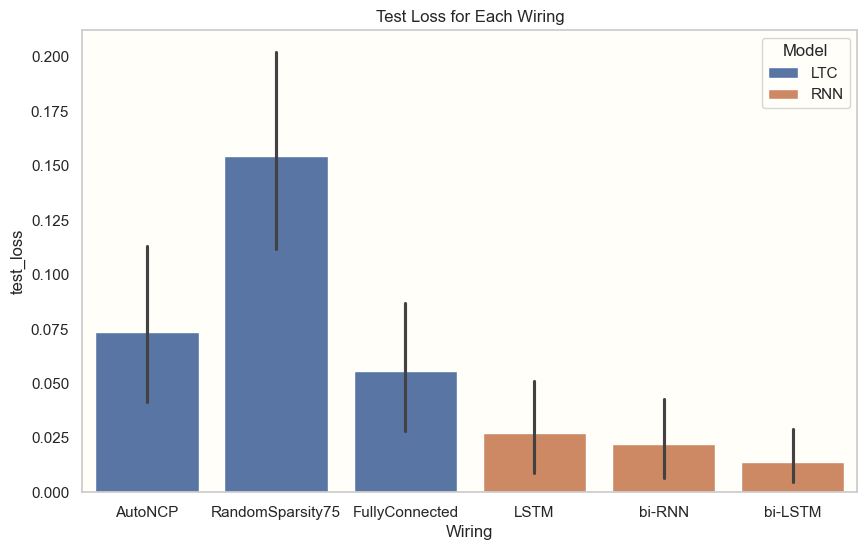

In [8]:


# split the label column into multiple columns
results_df[['Model', 'Wiring', 'Number Neurons', 'Learning Rate', 'Batch Size', 'Noise Level', 'Sequence Length']] = results_df['label'].str.split('_', expand=True)


# remove 'lr' from the learning rate and convert to float
results_df['Learning Rate'] = results_df['Learning Rate'].str.replace('lr', '').astype(float)

# remove 'batch' from the batch size and convert to int
results_df['Batch Size'] = results_df['Batch Size'].str.replace('batch', '').astype(int)

# remove 'noise' from the noise level and convert to float
results_df['Noise Level'] = results_df['Noise Level'].str.replace('noise', '').astype(float)

# remove 'length' from the sequence length and convert to int
results_df['Sequence Length'] = results_df['Sequence Length'].str.replace('length', '').astype(int)

# change dtyles of Number Neurons to int
results_df['Number Neurons'] = results_df['Number Neurons'].astype(int)


#%%

# plot a barplot of the final loss for each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Number Neurons', y='test_loss', data=results_df, hue='Model')
plt.title('Final Loss for Each Model')
plt.show()


# plota barplot of the test loss for each wiring
plt.figure(figsize=(10, 6))
sns.barplot(x='Wiring', y='test_loss', data=results_df, hue='Model')
plt.title('Test Loss for Each Wiring')
plt.show()


In [9]:
results_df.head()

,label,test_loss,val_loss,epoch_1_loss,epoch_2_loss,epoch_3_loss,epoch_4_loss,epoch_5_loss,epoch_6_loss,epoch_7_loss,...,epoch_23_loss,epoch_24_loss,epoch_25_loss,Model,Wiring,Number Neurons,Learning Rate,Batch Size,Noise Level,Sequence Length
0,LTC_AutoNCP_4_lr0.0001_batch10_noise0_length24,0.431200,0.431200,0.500587,0.494220,0.489302,0.485516,0.482606,0.480366,0.478631,...,0.447885,0.441859,0.434973,LTC,AutoNCP,4,0.0001,10,0.0,24
1,LTC_RandomSparsity75_4_lr0.0001_batch10_noise0...,0.446979,0.446978,0.742204,0.718919,0.697901,0.678483,0.660179,0.642660,0.625723,...,0.456580,0.452487,0.448762,LTC,RandomSparsity75,4,0.0001,10,0.0,24
2,LTC_FullyConnected_4_lr0.0001_batch10_noise0_l...,0.440916,0.440916,1.294436,1.241115,1.189692,1.140010,1.091793,1.044708,0.998400,...,0.458950,0.451629,0.444500,LTC,FullyConnected,4,0.0001,10,0.0,24
3,LTC_AutoNCP_8_lr0.0001_batch10_noise0_length24,0.351372,0.351372,0.525579,0.510647,0.497783,0.487444,0.479693,0.473707,0.468787,...,0.389451,0.373699,0.358346,LTC,AutoNCP,8,0.0001,10,0.0,24
4,LTC_RandomSparsity75_8_lr0.0001_batch10_noise0...,0.479444,0.479444,0.595789,0.569960,0.551377,0.537687,0.527233,0.518996,0.512347,...,0.480249,0.479886,0.479581,LTC,RandomSparsity75,8,0.0001,10,0.0,24


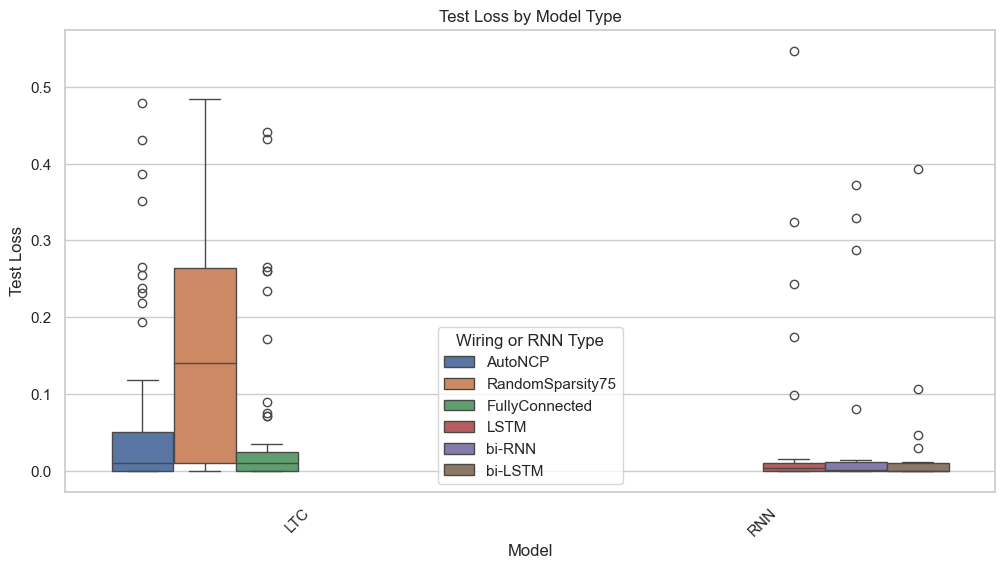

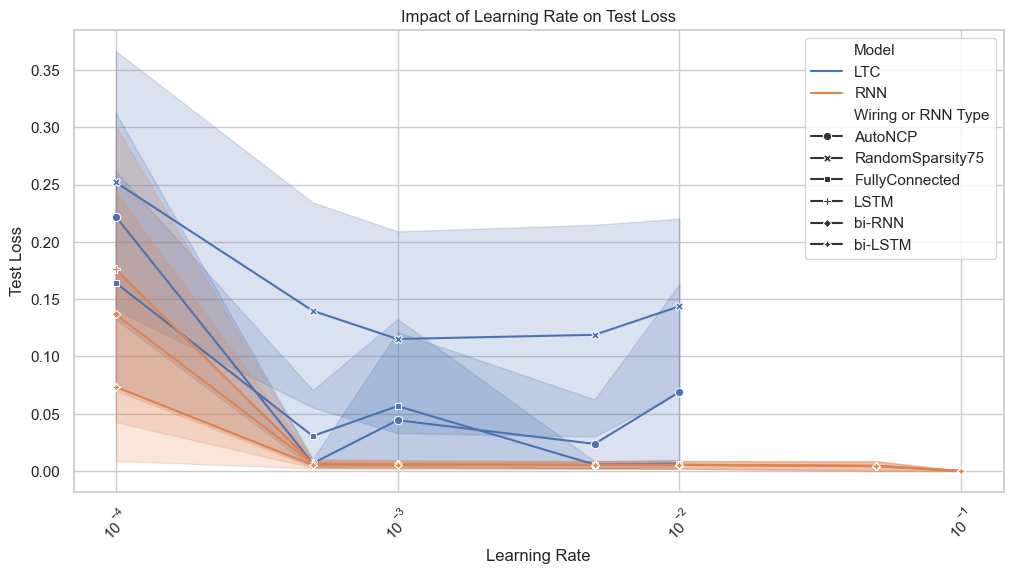

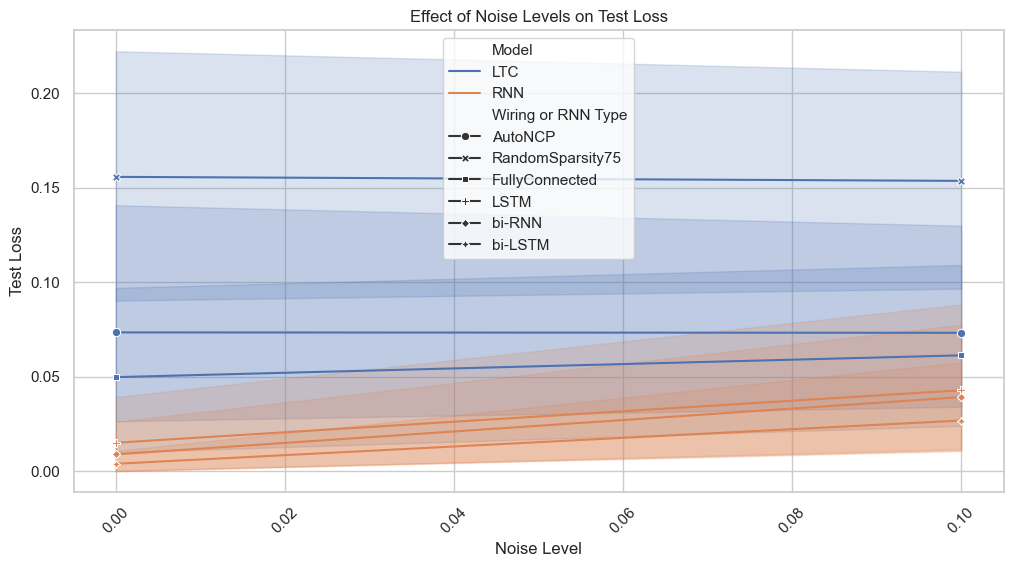

In [10]:
df = results_df.copy()
df["Val Loss"] = df["epoch_25_loss"].astype(float)
df["Test Loss"] = df["test_loss"].astype(float)
df["Wiring or RNN Type"] = df["Wiring"]

sns.set(style="whitegrid")

# 1. Final Loss by Model Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Model", y="Test Loss", hue="Wiring or RNN Type")
plt.title("Test Loss by Model Type")
plt.xticks(rotation=45)
plt.show()

# 3. Impact of Learning Rate on Final Loss
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Learning Rate", y="Test Loss", hue="Model", style="Wiring or RNN Type", markers=True, dashes=False)
plt.xscale("log")
plt.title("Impact of Learning Rate on Test Loss")
plt.xticks(rotation=45)
plt.show()

# 4. Effect of Noise Levels on Final Loss
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Noise Level", y="Test Loss", hue="Model", style="Wiring or RNN Type", markers=True, dashes=False)
plt.title("Effect of Noise Levels on Test Loss")
plt.xticks(rotation=45)
plt.show()



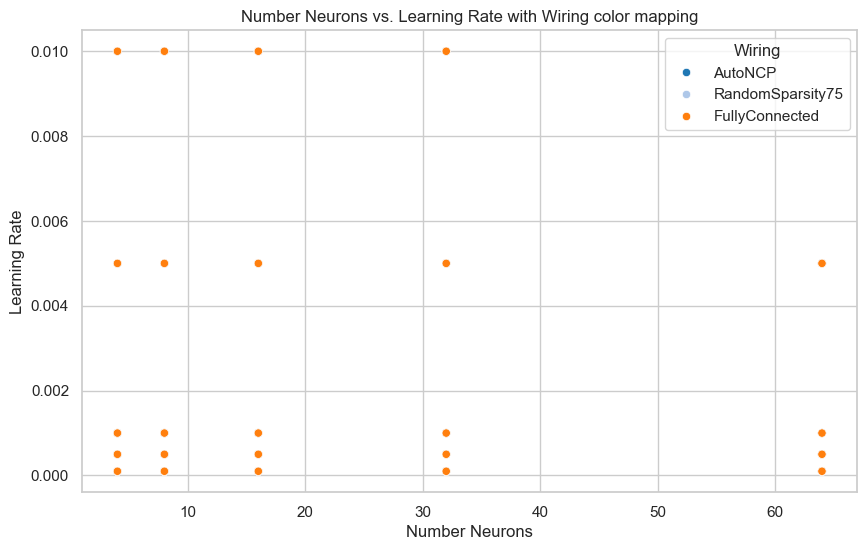

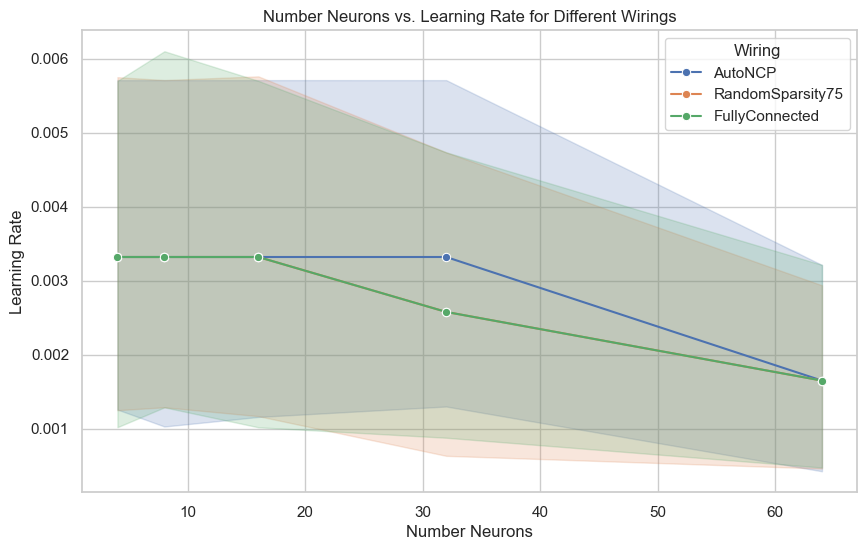

In [11]:
ltc_data = df[df['Model'] == 'LTC']


def plot_all_features(df, xaxis='Number Neurons', yaxis='Learning Rate'):
    ############### Scatter Plots with Color Mapping (Learning Rate vs. Number Neurons)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=xaxis, y=yaxis, hue='Wiring', palette='tab20')
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    fig_title = '{} vs. {} with Wiring color mapping'.format(xaxis, yaxis)
    plt.title(fig_title)
    # plt.legend(title='Alphabet')


    ############### Line Plots (Strength vs. Error)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x=xaxis, y=yaxis, hue='Wiring', marker='o')
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    fig_title = '{} vs. {} for Different Wirings'.format(xaxis, yaxis)
    plt.title(fig_title)
    # plt.legend(title='Alphabet')

    # ############### Heatmaps (Strength vs. Alphabet vs. Error)
    # heatmap_data = df.pivot_table(index='alphabet', columns=xaxis, values=yaxis)

    # plt.figure(figsize=(10, 6))
    # sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f')
    # plt.xlabel(xaxis)
    # plt.ylabel('Alphabet')
    # fig_title = '{} Heatmap: {} vs. Alphabet'.format(xaxis, yaxis)
    # plt.title(fig_title)

    # ############### Error Bars (Strength vs. Error):
    # plt.figure(figsize=(10, 6))
    # sns.barplot(data=df, x='strength', y='rmse', ci='sd')
    # plt.xlabel('Strength (t_identifier)')
    # plt.ylabel('RMSE')
    # fig_title = 'RMSE with Error Bars: Strength vs. Error'
    # plt.title(fig_title)



    # ############### Box Plots (Strength vs. Error):
    # plt.figure(figsize=(10, 6))
    # sns.boxplot(data=df, x='strength', y='rmse')
    # plt.xlabel('Strength (t_identifier)')
    # plt.ylabel('RMSE')
    # fig_title = 'RMSE Box Plot: Strength vs. Error'
    # plt.title(fig_title)

    # ################ Plot Average Error for Different Strengths
    # plt.figure(figsize=(10, 6))
    # plt.bar(df[xaxis], df[yaxis])
    # plt.xlabel('{} (t_identifier)'.format(xaxis))
    # plt.ylabel('Average {}'.format(yaxis))
    # fig_title = 'Average {} for Different {}s'.format(xaxis, yaxis)


plot_all_features(ltc_data, xaxis='Number Neurons', yaxis='Learning Rate')

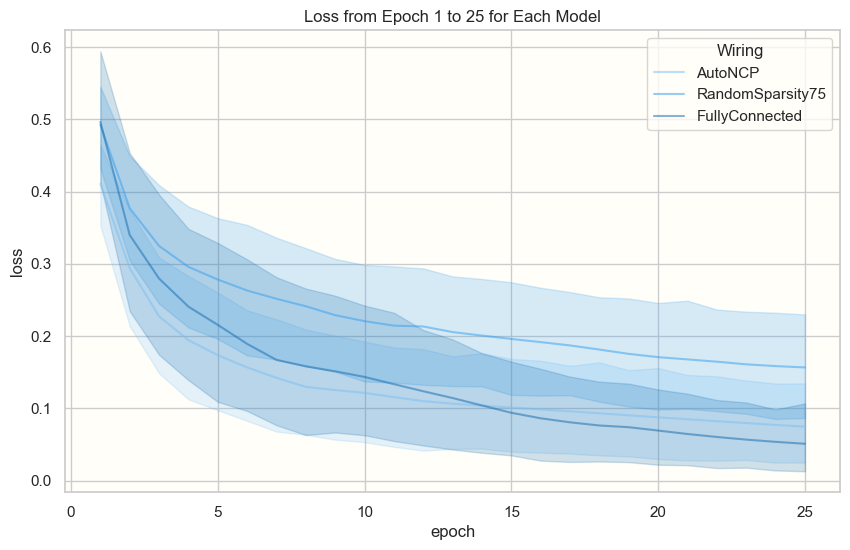

In [59]:
# plot the loss from epoch 1 to 25 for each model, with blue shades for LTC and green shades for RNN and transparency to see the overlap
# Melt the dataframe to have epochs in a single column
epoch_columns = [f'epoch_{i}_loss' for i in range(1, 26)]
melted_df = results_df[results_df['Model'] == 'LTC'].melt(id_vars=['Wiring'], value_vars=epoch_columns, var_name='epoch', value_name='loss')
ltc_palette = ["#78BFF4", "#329DEE", "#0F69AD"]
# Convert epoch column to integer
melted_df['epoch'] = melted_df['epoch'].str.extract('(\d+)').astype(int)

# Plot the loss from epoch 1 to 25 for each model, with blue shades for LTC and green shades for RNN and transparency to see the overlap
plt.figure(figsize=(10, 6))
sns.lineplot(x='epoch', y='loss', data=melted_df, hue='Wiring', palette=ltc_palette, alpha=0.5)
plt.title('Loss from Epoch 1 to 25 for Each Model')
plt.show()


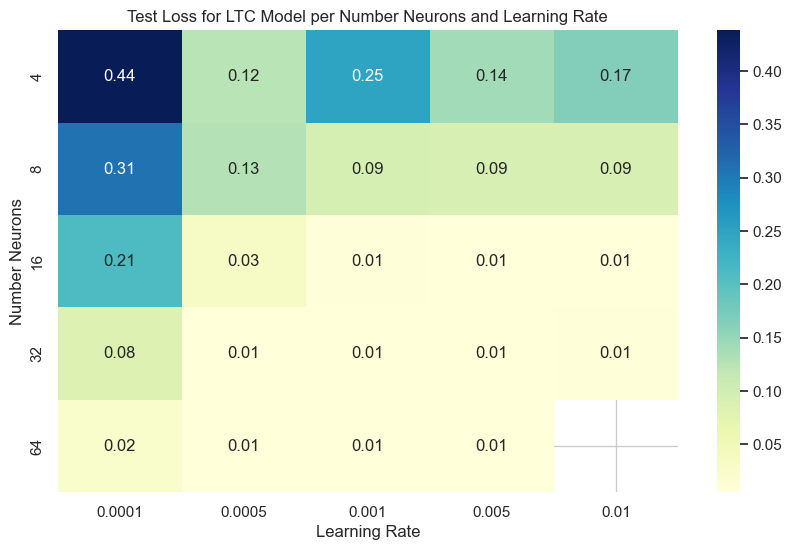

In [15]:
# plot a heatmap of the test loss for each model per number neurons and learning rate
ltc_data = results_df[results_df['Model'] == 'LTC']
ltc_data = ltc_data.pivot_table(index='Number Neurons', columns='Learning Rate', values='test_loss')
plt.figure(figsize=(10, 6))
sns.heatmap(ltc_data, cmap='YlGnBu', annot=True, fmt='.2f')
plt.xlabel('Learning Rate')
plt.ylabel('Number Neurons')
plt.title('Test Loss for LTC Model per Number Neurons and Learning Rate')
plt.show()



C:\Users\lcorpaci\AppData\Local\Temp\ipykernel_28320\2383245581.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  example_df = results_df[results_df['Number Neurons'] == 4][results_df['Learning Rate'] == 0.001]


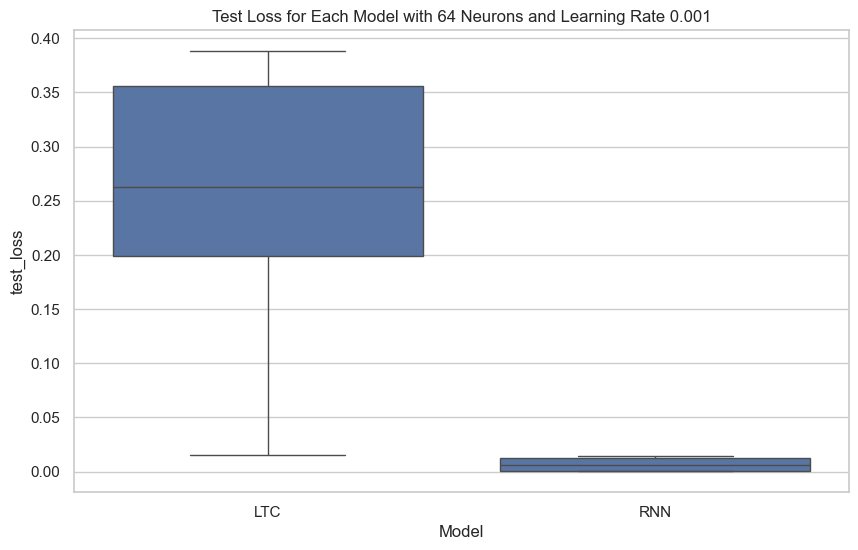

In [31]:
example_df = results_df[results_df['Number Neurons'] == 4][results_df['Learning Rate'] == 0.001]

# plot a boxplot of the test loss for each model per number neurons and learning rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='test_loss', data=example_df)
plt.title('Test Loss for Each Model with 64 Neurons and Learning Rate 0.001')
plt.show()
